## Общая информация

дата первого диалога: 26 июня 2017

дата сбора статистики: 14 ноября 2017

период сбора статистики: 141 день

всего диалогов: > 45000

всего сообщений: > 600000

сообщений на диалог: примерно 13.2

всего юзеров чата: > 6500

всего взаимодействовало с ботом: > 15000

диалогов на среднестатистического юзера: примерно 7.13

максимальное число диалогов на юзера: 1131

Замечания: тематические паблики создают больше трафика


## Для 145254340

дата первого диалога: 26 июня 2017

дата сбора статистики: 14 ноября 2017

период сбора статистики: 141 день

всего диалогов: 36165

всего сообщений: 745320

из них входящих: 382652

из них исходящих: 362668

сообщений на диалог: примерно 13.2

всего юзеров чата: 3975

всего взаимодействовало с ботом: > 15000

диалогов на среднестатистического юзера: примерно 7.13

максимальное число диалогов на юзера: 1131

Замечания: тематические паблики создают больше трафика


In [1]:
from os import listdir
from os.path import isfile, join
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)


In [2]:
init_path = 'csv_dialogs'

In [3]:
group_ids = [int(re.split('\.', f)[0]) for f in listdir(init_path) if (isfile(join(init_path, f)) and re.match('\d+.csv', f) is not None)]
group_ids = [145254340]

In [4]:
groups_data = []
for group_id in group_ids:
    group_data = pd.read_csv(join(init_path, '{}.csv'.format(group_id)))
    group_data['group_id'] = group_id
    groups_data.append(group_data)
groups_data = pd.concat(groups_data)
groups_data

,user_id,dialog_number,message_number,text,is_income,group_id
0,402472964,0,0,Собеседник: \nПриветствую,1,145254340
1,402472964,0,1,Собеседник: \nЗдрастееэээ?,1,145254340
2,402472964,0,2,Собеседник: \nЭм...,1,145254340
3,402472964,0,3,Собеседник: \nМммм...,1,145254340
4,402472964,0,4,Собеседник: \nТы на связи?,1,145254340
5,402472964,0,5,Собеседник: \nЗначитс,1,145254340
6,402472964,0,6,Собеседник: \nПросто так читаешь,1,145254340
7,402472964,0,7,Собеседник: \nСкучно поди,1,145254340
8,402472964,0,8,Собеседник: \nИнтересно посмотреть на что люди...,1,145254340
9,402472964,0,9,Собеседник: \nА давайте увеличим ставки,1,145254340


In [5]:
groups_dialogs_top = groups_data.groupby('user_id').agg({'dialog_number': lambda x: np.max(x) + 1, 'group_id': np.max}).sort_values('dialog_number', ascending=False).reset_index()

In [6]:
groups_dialogs_top.head()

,user_id,group_id,dialog_number
0,422045523,145254340,743
1,160180977,145254340,565
2,409391325,145254340,420
3,392172223,145254340,382
4,416778326,145254340,327


In [7]:
# groups_dialogs_top[groups_dialogs_top['dialog_number'] >= 0].shape
import re
my_str = 'Собеседник:\nпривет'
my_mes = re.split(r'Собеседник:\n', my_str, maxsplit = 1)[-1]
print my_mes
my_str2 = 'Собеседник отправил стикер'
print re.split('Собеседник:\n', my_str2)[-1]

привет
Собеседник отправил стикер


In [8]:
# всего диалогов
dialogs_count = groups_dialogs_top['dialog_number'].sum()
dialogs_count

36165

In [9]:
# всего сообщений
messages_total_count = groups_data.shape[0]
messages_total_count

745320

In [10]:
# входящих сообщений
income_messages_count = groups_data['is_income'].sum()
income_messages_count

362668

In [11]:
# исходящих сообщений
outcome_messages_count = messages_total_count - groups_data['is_income'].sum()
outcome_messages_count

382652

In [12]:
# сообщений на диалог
messages_total_count / np.float(dialogs_count)

20.608875985068437

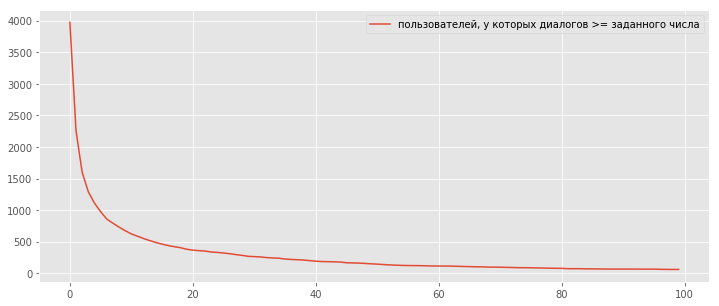

In [52]:
# число пользователей, у которых диалогов >= заданного числа 
i = 0
iterate = True
t_count = 0
d_counts = []
while iterate:
    d_count = (groups_dialogs_top['dialog_number'] > i).sum()
    d_counts.append(d_count)
    t_count += d_count
    
    iterate = t_count < dialogs_count and len(d_counts) < 100
    i += 1

groups_dialogs_top[groups_dialogs_top['dialog_number'] >= 0].shape
plt.plot(xrange(i), d_counts, label=u'число пользователей, у которых диалогов >= заданного числа')
plt.legend()
# d_counts

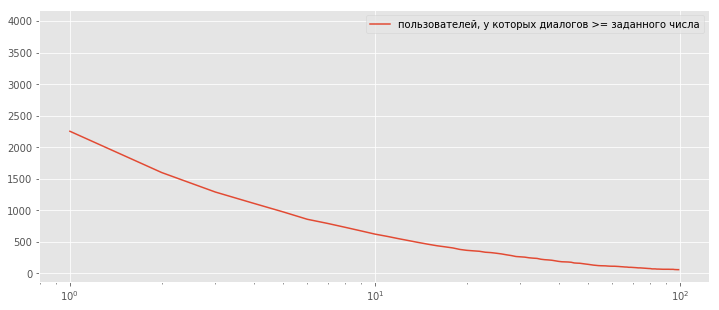

In [54]:
plt.plot(xrange(i), d_counts, label=u'пользователей, у которых диалогов >= заданного числа')
plt.legend()
plt.xscale('log')


In [17]:
group_by_dialog_size = group_data.groupby(('user_id', 'dialog_number'))
agg_dialogs = group_by_dialog_size.agg({'message_number': lambda x: np.max(x) + 1})

s_agg_dialogs = agg_dialogs.sort_values('message_number', ascending=False).reset_index()
count_mes_more_than = []
for i in xrange(10, 1000):
    res = s_agg_dialogs.query('message_number > {}'.format(i)).shape[0]
    count_mes_more_than.append(res)

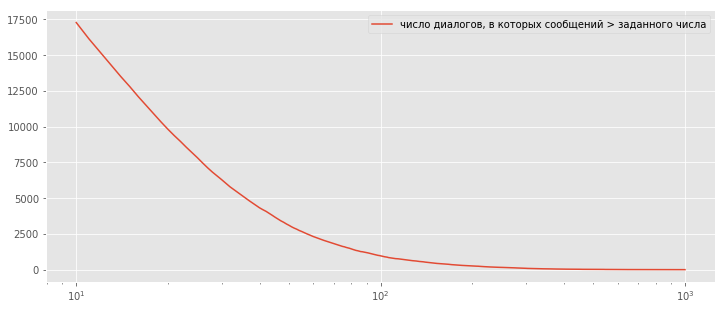

In [19]:
plt.plot(xrange(10, 1000), count_mes_more_than, label=u'число диалогов, в которых сообщений > заданного числа')
plt.legend()
plt.xscale('log')

In [12]:
income_only = groups_data[groups_data['is_income'] == 1]

In [15]:
income_only
groups_data['user_id'].nunique()

6485

In [5]:
# group_id = 145254340 is the longest
group_id = 145254340
group_data = pd.read_csv(join(init_path, '{}.csv'.format(group_id)))

group_data.loc[:,'text'] = group_data.loc[:,'text'].str.decode('utf-8').str.lower()
keys = group_data['is_income'] == 1
group_data.loc[keys,'text'] = group_data[keys]['text'].str.slice(13)
group_data.head()

,user_id,dialog_number,message_number,text,is_income
0,402472964,0,0,приветствую,1
1,402472964,0,1,здрастееэээ?,1
2,402472964,0,2,эм...,1
3,402472964,0,3,мммм...,1
4,402472964,0,4,ты на связи?,1


In [6]:
#group_data['dialog_count'] = group_data.groupby('user_id').agg({'dialog_number': lambda x: np.max(x) + 1})

In [16]:
group_data.groupby(('user_id', 'dialog_number')).agg({'message_number': lambda x: np.max(x) + 1})

message_number
user_id   dialog_number                
2315359   0                           9
2486613   0                           6
          1                          22
          2                           3
          3                           3
          4                           6
          5                          20
          6                           5
          7                           4
          8                           6
          9                           5
          10                          2
          11                         78
          12                         28
          13                         12
          14                          7
          15                          5
          16                         26
          17                          6
          18                          1
          19                          2
          20                          7
          21                          3
          22                          4
          23                          4
          24                         41
          25                         15
          26                         13
          27                         15
          28                         17
...                                 ...
451328386 0                           2
451364967 0                          22
451516500 0                           5
452014795 0                          31
          1                           7
453202705 0                           3
          1                          17
453324451 0                           3
          1                           4
          2                           2
          3                          30
          4                          20
          5                          16
          6                          74
          7                          36
          8                           4
          9                          76
          10                          9
          11                          3
453864730 0                           2
454264964 0                           3
          1                          15
454787103 0                           4
454823966 0                           1
454888137 0                           2
          1                           1
          2                          15
          3                          19
          4                          35
454917234 0                           6

[35734 rows x 1 columns]

In [28]:
dialogs_count = group_data.groupby('user_id').agg({'dialog_number': lambda x: (np.max(x) + 1)})
dialogs_count = dialogs_count.sort_values('dialog_number', ascending=False).reset_index()
dialogs_count.head()

,user_id,dialog_number
0,42409559,2
1,131424050,2


In [14]:
bins = np.linspace(1, 3, 5)
bins

array([ 1. ,  1.5,  2. ,  2.5,  3. ])

In [13]:
#sns.barplot(x=dialogs_count.user_id, y=dialogs_count.dialog_number)
dialogs_count

,user_id,dialog_number
0,422045523,743
1,160180977,565
2,409391325,420
3,392172223,382
4,416778326,327
5,128571431,298
6,344901464,296
7,237511060,290
8,434282618,287
9,377452515,269


In [11]:
dialogs_count_log = dialogs_count.copy()

In [26]:
dialogs_count_log['dialog_number'] = dialogs_count['dialog_number'].apply(lambda x: np.log(x))
#dialogs_count_log.tail()
n_bins = 15
bins = np.linspace(dialogs_count_log.dialog_number.min(), dialogs_count_log.dialog_number.max(), n_bins)
#bins
sns.distplot(dialogs_count_log.dialog_number, kde=False, bins=bins)

NameError: name 'dialogs_count' is not defined

In [48]:
# time getter
import json
histories_path = 'json_histories'
group_ids = [int(re.split('\.', f)[0]) for f in listdir(histories_path) if (isfile(join(histories_path, f)) and re.match('\d+.json', f) is not None)]

oldest_mes_date = 10000000000
group_ids = [145254340]
for group_id in group_ids:
    print('for group', group_id)
    with open(join(histories_path, '{}.json'.format(group_id)), 'r') as f:
        for line in f:
            user_history = json.loads(line[:-1])
            user_id = user_history.keys()[0]
            for message in user_history[user_id]:
                if message['date'] < oldest_mes_date:
                    oldest_mes_date = message['date']
#                 print(message['date'])
#                 break
#             break
#     break
print oldest_mes_date

('for group', 150056870)
('for group', 144200174)
('for group', 104200029)
{u'body': u'\u0414\u0430\u0432\u043d\u043e \u043d\u0435 \u0431\u044b\u043b\u043e \u043d\u043e\u0432\u044b\u0445  \u043f\u043e\u0441\u0442\u043e\u0432, \u044f \u043f\u0435\u0440\u0435\u0436\u0438\u0432\u0430\u044e) \u0432\u0441\u0435 \u043e\u0442 \u0432 \u043f\u043e\u0440\u044f\u0434\u043a\u0435?', u'user_id': 8840631, u'date': 1456431056, u'out': 0, u'read_state': 1, u'id': 1, u'from_id': 8840631}
('for group', 145374862)
('for group', 47774777)
('for group', 149333570)
('for group', 150407289)
('for group', 153209244)
('for group', 117962007)
('for group', 145254340)
('for group', 135045983)
('for group', 105101039)
('for group', 145809686)
('for group', 142731913)
('for group', 150077810)
('for group', 145129593)
('for group', 143327922)
('for group', 148226782)
('for group', 151811253)
('for group', 148577565)
1456431056


In [35]:
import datetime
time_fst_mes = datetime.datetime.fromtimestamp(oldest_mes_date)
print time_fst_mes

2017-06-26 22:23:34


In [33]:
# time 1456431056
print u'\u0414\u0430\u0432\u043d\u043e \u043d\u0435 \u0431\u044b\u043b\u043e \u043d\u043e\u0432\u044b\u0445  \u043f\u043e\u0441\u0442\u043e\u0432, \u044f \u043f\u0435\u0440\u0435\u0436\u0438\u0432\u0430\u044e) \u0432\u0441\u0435 \u043e\u0442 \u0432 \u043f\u043e\u0440\u044f\u0434\u043a\u0435?'

Давно не было новых  постов, я переживаю) все от в порядке?


In [47]:
groups_data.head()

,user_id,dialog_number,message_number,text,is_income,group_id
0,418223530,0,0,Собеседник: \nКу,1,144200174
1,418223530,0,1,!,0,144200174
2,418223530,1,0,!,0,144200174
3,81298075,0,0,привет,0,144200174
4,81298075,0,1,Собеседник: \nПривет,1,144200174
